In [1]:
import cv2
import os
import math
from matplotlib import pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np


In [2]:
img = cv2.imread('1st.jpg')
img2 = cv2.imread('2nd.jpg')

In [3]:
# 히스토그램부터 그려보기
sample_1 = 'cropped_2/1_cropped.png'
img1 = cv2.imread(sample_1, 0)
img1 = cv2.equalizeHist(img1)

In [ ]:
plt.bar(list(range(len(fd))), fd)

3_cropped.png


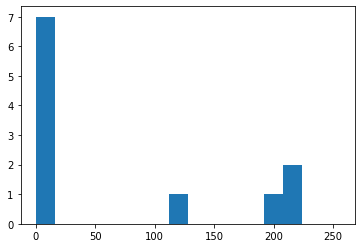

<ipython-input-7-f3330dfabda8>:16: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img1, orientations=15, pixels_per_cell=(3,3),cells_per_block=(5, 5), visualize=True, multichannel=False)


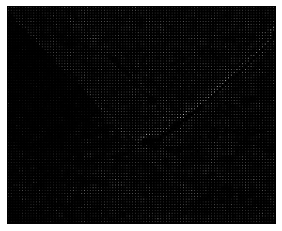

KeyboardInterrupt: 

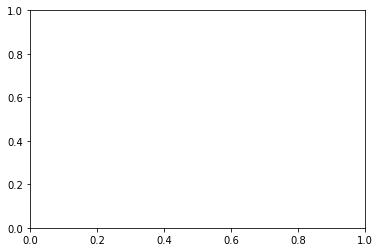

In [7]:
final_result = dict()

for file_nm_1 in os.listdir('./cropped_1') :
    print(file_nm_1)
    
    if '.DS' not in file_nm_1 :
        tmp_result = dict()
        file_path_1 = os.path.join('./cropped_1', file_nm_1)

        img1 = cv2.imread(file_path_1, 0)
        img1 = cv2.equalizeHist(img1)

        hist1 = cv2.calcHist([img1], [0], None, [16], [0, 16])
        plt.hist(hist1, 16, [0,256]); plt.show()

        fd, hog_image = hog(img1, orientations=15, pixels_per_cell=(3,3),cells_per_block=(5, 5), visualize=True, multichannel=False)      

        plt.axis("off")
        plt.imshow(hog_image, cmap="gray")
        plt.show()
        hist1 = cv2.calcHist([np.float32(fd)], [0], None, [16], [0, 16])
        #plt.hist(fd.reshape(-1), bins=16)
        plt.bar(list(range(len(fd))), fd)
        plt.show()

        for file_nm_2 in os.listdir('./cropped_2') :
            
            if '.DS' not in file_nm_2 :
                print(file_nm_2)
                file_path_2 = os.path.join('./cropped_2', file_nm_2)

                img2 = cv2.imread(file_path_2, 0)
                img2 = cv2.equalizeHist(img2)

                hist2 = cv2.calcHist([img2], [0], None, [16], [0, 16])
                plt.hist(hist2, 16, [0,256]); plt.show()

                fd, hog_image = hog(img2, orientations=15, pixels_per_cell=(3,3),cells_per_block=(5, 5), visualize=True, multichannel=False)      

                plt.axis("off")
                plt.imshow(hog_image, cmap="gray")
                plt.show()
                hist2 = cv2.calcHist([np.float32(fd)], [0], None, [len], [0, 16])
                #plt.hist(fd.reshape(-1), bins=16)
                plt.bar(list(range(len(fd))), fd,  bins=16)
                plt.show()

                # get distance
                sum = 0
                for i in range(0, 16) :
                    sum = sum + (hist1[i][0]-hist2[i][0]) ** 2

                dist = math.sqrt(sum)
                #print(f'-- Euclidean distance between {file_nm_1} and {file_nm_2} : ', dist)

                tmp_result[file_nm_2] = dist


            # img1의 각 점에서 뭐가 매칭되는지 확인
            print('#######################################')
            tmp_result_sort = sorted(tmp_result.items(), key = lambda item: item[1], reverse = False)
            print(f'-- {file_nm_1} : ', tmp_result_sort )
            print('-- closest point : ', tmp_result_sort[0])

            final_result[file_nm_1] = tmp_result_sort[0][0]
            print()
        
    
    

In [ ]:
final_result